# The Sparks Foundation Internship (APR 2024) - Data Science and Business Analytics
Author: Roshni Sanjay Jadhav

Problem Statement: Unsupervised Machine Learning : K-means Clustering

Given the dataset iris, predict the optimum number of clusters and represent it visually

Importing libraries

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

Importing the data

In [37]:
df = sns.load_dataset('iris')
df.head()                       #To view few rows of df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


EDA

In [38]:
df.shape         #To view total number of rows and columns

(150, 5)

There are total 150 rows and 5 columns

In [39]:
df.info()      #To view total entries, column names, missing values, datatypes.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [40]:
print(df.isnull().sum())           #To check missing values
df.describe(include='all')         #Statistical summary of data

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


There are no missing values

In [41]:
df['species'].value_counts()       #To view unique values 

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

There are total 3 unique species\
1.Setosa
2.Versicolor
3.Virginica

In [42]:
X = df.iloc[:, [0, 1, 2, 3]].values          #To extract independent variables

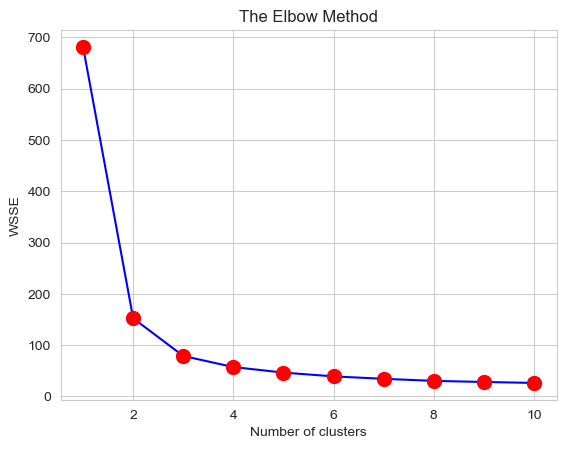

In [43]:
from sklearn.cluster import KMeans
 
wsse = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,  random_state = 10)
    kmeans.fit(X)
    wsse.append(kmeans.inertia_)
plt.plot(range(1, 11), wsse,color='blue',mec='red',marker='o',mfc='red',ms=10)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSSE')
plt.show()

We can clearly see that elbow point is at 3.
So, number of optimum clusters will be 3.

In [44]:
kmeans=KMeans(n_clusters=3,random_state=10)
Y_pred=kmeans.fit_predict(X)

In [45]:
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [46]:
kmeans.inertia_         #gives the within-cluster sum of squares (WSSE), which is a measure of how internally coherent the clusters are.

78.85144142614601

In [47]:
kmeans.n_iter_     #gives the number of iterations run by the KMeans algorithm to converge to the final solution.

3

In [48]:
kmeans.cluster_centers_      #returns the coordinates of the cluster centers in the feature space.

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [49]:
df['Clusters']=Y_pred
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species,Clusters
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
5,5.4,3.9,1.7,0.4,setosa,0
6,4.6,3.4,1.4,0.3,setosa,0
7,5.0,3.4,1.5,0.2,setosa,0
8,4.4,2.9,1.4,0.2,setosa,0
9,4.9,3.1,1.5,0.1,setosa,0


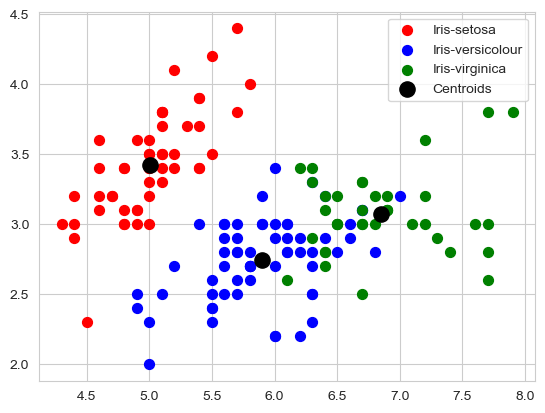

In [51]:
plt.scatter(X[Y_pred == 0, 0], X[Y_pred == 0, 1], 
            s = 50, c = 'red', label = 'Iris-setosa')
plt.scatter(X[Y_pred == 1, 0], X[Y_pred == 1, 1], 
            s = 50, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[Y_pred == 2, 0], X[Y_pred == 2, 1],
            s = 50, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 120, c = 'black', label = 'Centroids')

plt.legend()

Conclusion:
    
1. From elbow method, we can see clearly optimum number of clusters for iris dataset is 3.
2. K-means is an unsupervised machine learning algorithm. Using K-means, data has been clustered in 3 clusters of flower species.